In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline

## Downloading data

In [ ]:
!wget https://github.com/Horea94/Fruit-Images-Dataset/archive/master.zip -O master.zip

--2024-05-27 16:27:14--  https://github.com/Horea94/Fruit-Images-Dataset/archive/master.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/Horea94/Fruit-Images-Dataset/zip/refs/heads/master [following]
--2024-05-27 16:27:14--  https://codeload.github.com/Horea94/Fruit-Images-Dataset/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.112.10
Connecting to codeload.github.com (codeload.github.com)|140.82.112.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [         <=>        ] 761.30M  31.4MB/s    in 27s     

2024-05-27 16:27:42 (28.2 MB/s) - ‘master.zip’ saved [798281939]



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip master.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/148_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/149_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/150_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/151_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/152_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/153_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/154_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/155_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/156_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/157_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/158_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/159_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato

## Creating Tensorflow Datasets

In [ ]:
batch_size=256
image_size=(100, 100)

**Dataset for training**

In [ ]:
train_dataset = image_dataset_from_directory('/content/Fruit-Images-Dataset-master/Training',
                                             subset='training',
                                             seed=42,
                                             validation_split=0.1,
                                             batch_size=batch_size,
                                             image_size=image_size)

Found 67692 files belonging to 131 classes.
Using 60923 files for training.


**Dataset for testing**

In [ ]:
validation_dataset = image_dataset_from_directory('/content/Fruit-Images-Dataset-master/Training',
                                             subset='validation',
                                             seed=42,
                                             validation_split=0.1,
                                             batch_size=batch_size,
                                             image_size=image_size)

Found 67692 files belonging to 131 classes.
Using 6769 files for validation.


## Class Names

In [ ]:
class_names = train_dataset.class_names
class_names

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apricot',
 'Avocado',
 'Avocado ripe',
 'Banana',
 'Banana Lady Finger',
 'Banana Red',
 'Beetroot',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cauliflower',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Chestnut',
 'Clementine',
 'Cocos',
 'Corn',
 'Corn Husk',
 'Cucumber Ripe',
 'Cucumber Ripe 2',
 'Dates',
 'Eggplant',
 'Fig',
 'Ginger Root',
 'Granadilla',
 'Grape Blue',
 'Grape Pink',
 'Grape White',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Hazelnut',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kohlrabi',
 'Kumquats',
 'Lemon',
 'Lemon Meyer',
 'Limes',
 'Lychee',
 'M

**Image examples**

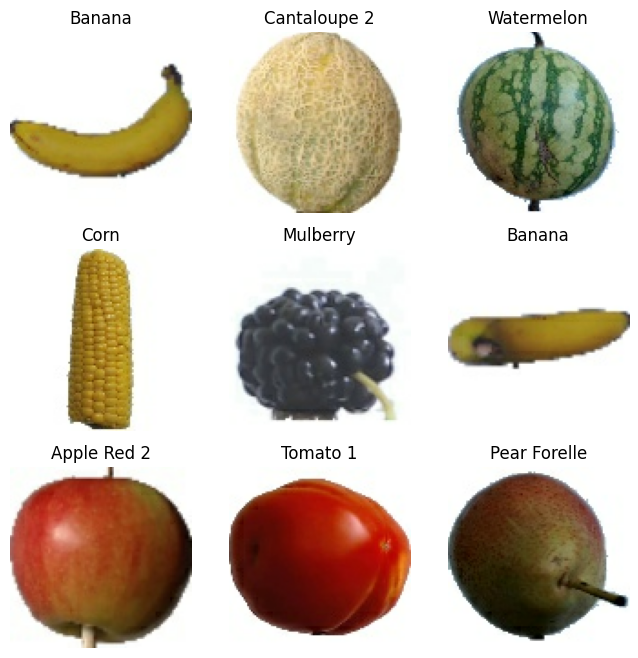

In [ ]:
plt.figure(figsize=(8, 8))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

**Dataset for testing**

In [ ]:
test_dataset = image_dataset_from_directory('/content/Fruit-Images-Dataset-master/Test',
                                             batch_size=batch_size,
                                             image_size=image_size)

Found 22688 files belonging to 131 classes.


In [ ]:
test_dataset.class_names

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apricot',
 'Avocado',
 'Avocado ripe',
 'Banana',
 'Banana Lady Finger',
 'Banana Red',
 'Beetroot',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cauliflower',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Chestnut',
 'Clementine',
 'Cocos',
 'Corn',
 'Corn Husk',
 'Cucumber Ripe',
 'Cucumber Ripe 2',
 'Dates',
 'Eggplant',
 'Fig',
 'Ginger Root',
 'Granadilla',
 'Grape Blue',
 'Grape Pink',
 'Grape White',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Hazelnut',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kohlrabi',
 'Kumquats',
 'Lemon',
 'Lemon Meyer',
 'Limes',
 'Lychee',
 'M

# Saving list of class names in file

In [ ]:
file = open("labels.txt","w")
for i in test_dataset.class_names:
  file.write(i+'\n')
file.close()

## Setting up performance TensorFlow DataSets

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

## Creating sequential model

In [ ]:
# Creating sequential model
model = Sequential()
# Convolutional layer
model.add(Conv2D(16, (5, 5), padding='same',
                 input_shape=(100, 100, 3), activation='relu'))
# Max Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Convolutional layer
model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
# Max Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Convolutional layer
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
# Max Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Convolutional layer
model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
# Max Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dense layers for classification
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
# Output layer with 131 classes
model.add(Dense(131, activation='softmax'))

**Compiling model**

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

## Train the model

In [ ]:
history = model.fit(train_dataset,
                    validation_data=validation_dataset,
                    epochs=5,
                    verbose=2)

Epoch 1/5
238/238 - 32s - loss: 2.0174 - accuracy: 0.5937 - val_loss: 0.1041 - val_accuracy: 0.9691 - 32s/epoch - 134ms/step
Epoch 2/5
238/238 - 20s - loss: 0.1324 - accuracy: 0.9574 - val_loss: 0.0151 - val_accuracy: 0.9963 - 20s/epoch - 83ms/step
Epoch 3/5
238/238 - 19s - loss: 0.0626 - accuracy: 0.9795 - val_loss: 0.0131 - val_accuracy: 0.9969 - 19s/epoch - 78ms/step
Epoch 4/5
238/238 - 22s - loss: 0.0503 - accuracy: 0.9844 - val_loss: 0.0074 - val_accuracy: 0.9990 - 22s/epoch - 93ms/step
Epoch 5/5
238/238 - 25s - loss: 0.0437 - accuracy: 0.9865 - val_loss: 0.0081 - val_accuracy: 0.9987 - 25s/epoch - 107ms/step


## Model evaluating

In [ ]:
scores = model.evaluate(test_dataset, verbose=1)

89/89 [==============================] - 6s 59ms/step - loss: 0.2358 - accuracy: 0.9463


In [ ]:
print("Доля вірних відповідей на тестових даних, у відсотках:", round(scores[1] * 100, 4))

Доля вірних відповідей на тестових даних, у відсотках: 94.6315


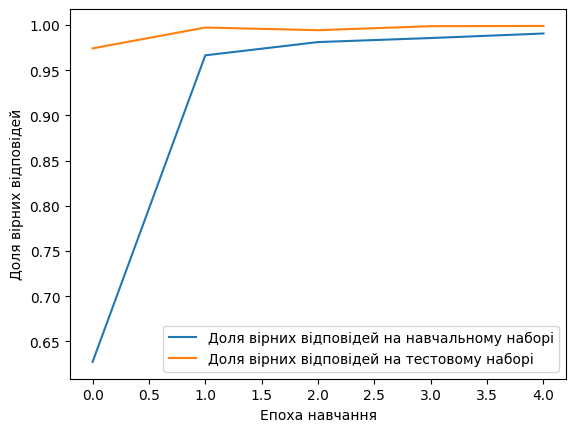

In [ ]:
plt.plot(history.history['accuracy'],
         label='Доля вірних відповідей на навчальному наборі')
plt.plot(history.history['val_accuracy'],
         label='Доля вірних відповідей на тестовому наборі')
plt.xlabel('Епоха навчання')
plt.ylabel('Доля вірних відповідей')
plt.legend()
plt.show()

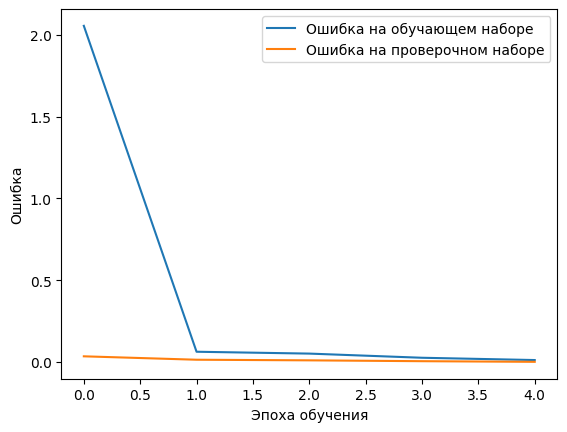

In [ ]:
plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

## Saving the model

In [ ]:
model.save("fruits_360_model1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Saving model on local computer

In [ ]:
files.download("fruits_360_model1.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>